In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

## Problema 2

In [2]:
N = 10
x = 0.5
e= 0

for n in range(N):
    e += (x**n)/np.math.factorial(n)
    print(e)

    

1.0
1.5
1.625
1.6458333333333333
1.6484375
1.6486979166666667
1.6487196180555554
1.6487211681547618
1.6487212650359622
1.648721270418251


## Problema 3

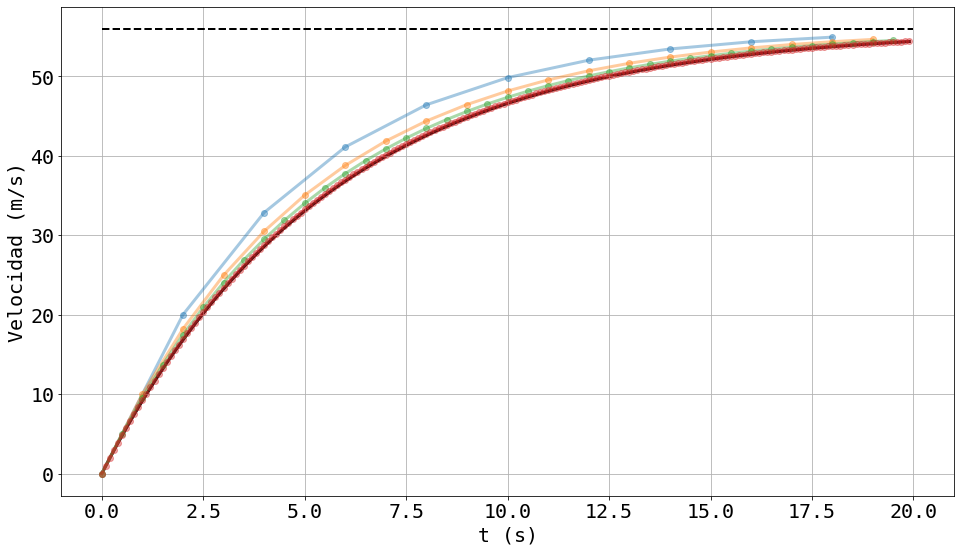

In [3]:
m = 70 #kg
gamma = 12.5 #kg/seg
g = 10 #m/s2
deltaT = [2, 1, 0.5, 0.1 ]
tf = 20

vlim = g*m/gamma

plt.figure(figsize=(16,9))

plt.xlabel('t (s)')
plt.ylabel('Velocidad (m/s)') 
plt.hlines(vlim, 0, tf, color='k', linestyles='dashed')

plt.grid(True)

for dt in deltaT:
    t = np.arange(0,tf, dt)
    v = np.zeros(len(t))
    v_analitica = g*m/gamma*(1-np.exp(-(gamma/m)*t))
    for i in range(len(t)):
        if i ==0:
            v[i] = 0
        else:
            v[i] = v[i-1] + (g - gamma/m*v[i-1])*dt

    plt.plot(t, v, 'o-',linewidth= 3, alpha=0.4)

plt.plot(t, v_analitica, 'k', linewidth=3, zorder=-1)

## Problema 4

In [4]:
A = np.array([[1,-3,-2], [2,-4,-3], [-3,6,8]])
b = np.array([6,8,-5])

x = np.linalg.solve(A,b)
x

array([ 1., -3.,  2.])

## Problema 5

$$
J = -k\frac{dT}{dz}
$$

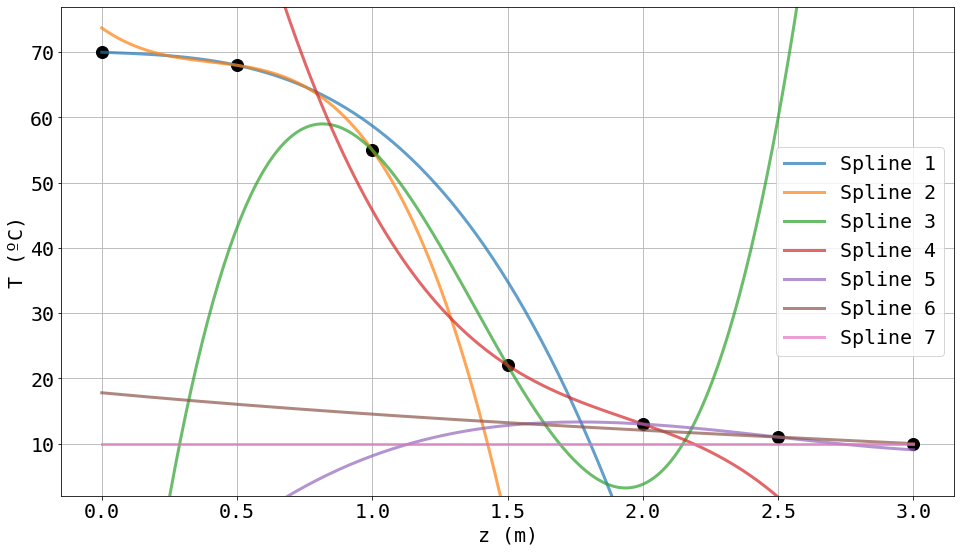

In [5]:
k = 0.01 #cal/(s cm �C)
z = np.array([0, 0.5, 1., 1.5, 2.0, 2.5, 3.])
T = np.array([70, 68, 55, 22, 13, 11, 10])
N = len(z)

h = [z[i+1]-z[i] for i in range(N-1)]
A = np.eye(N)
y = np.zeros((N,1))
for i in range(1, N-1):
    A[i,i] = 2*(h[i]+h[i-1])
    A[i,i-1] = h[i-1]
    A[i,i+1] = h[i]
    y[i] = 3*(T[i+1]-T[i])/h[i] - (T[i]-T[i-1])/h[i-1]
    
b = np.linalg.solve(A,y)

d = T
c = np.zeros((N,1))
a = np.zeros((N,1))
for i in range(N-1):
    a[i] = 1/3*(b[i+1]-b[i])/h[i]
    c[i] = ((d[i+1]-d[i])/h[i])- b[i]*h[i] - a[i]*h[i]**2 



plt.plot(z, T, 'ok', lw=4, markersize=12)

for i in range(N):
    z_ext = np.linspace(min(z), max(z), 300)
    f = d[i] + c[i]*(z_ext-z[i]) + b[i]*(z_ext-z[i])**2 + a[i]*(z_ext-z[i])**3
    plt.plot(z_ext, f, alpha=0.7, label= 'Spline {}'.format(i+1), lw=3)

plt.ylim([min(T)*0.2,max(T)*1.1])
plt.legend()
plt.ylabel('T (ºC)')
plt.xlabel('z (m)')
plt.grid(True)

## Problema 7
fd

In [6]:
a = 0
b = 30
n = 50
dz = b/n #-> n es num intervalos!
# h = (b - a) / (n - 1)
# si hay n intervalos entonces hay n+1 puntos
#z = np.linspace(a, b, n)
z = np.linspace(a, b, n+1)
# print(z)
# z = np.arange(a, b, )
f = 200 * (z/(5+z))*np.exp(-2*z/30)

#el t�rmino (b-a)/2 en nuestro caso es n que es el intervalo que utilizo 
#como base de mi trapecio o de mi caudradu

#I_sq = np.sum(dz*f)
I_sq = dz*f.sum()
I_trap = dz*(2*np.sum(f) - (f[0] + f[-1]))/2
I = np.trapz(f, dx=dz)

#list2 = [x for ind, x in enumerate(list1) if 4 > ind > 0]

de aca podemos sacar el valor para validar:

In [7]:
from scipy.integrate import quadrature

In [8]:
Ival = quadrature(lambda z: 200 * (z/(5+z))*np.exp(-2*z/30), a, b,rtol = 1e-10)
# i.e. la integral de la funcion entre a y b con error relativo 1e-10 , con cuadraturas de gauss

In [9]:
Ival

(1480.5684801201032, 1.3338126336748246e-07)

In [10]:
Isimpson = ((b-a)/(n))*(f[0] + 4*f[1:-1:2].sum() + 2*f[2:-2:2].sum()+f[-1])/3

In [11]:
Isimpson

1480.5591891497816

<div style="background:#999900">a ver la paridad de los que estas agarrando:</div>

In [12]:
evens = np.array([i for i, even in enumerate(f) if (i%2==0) & (i>0)])

In [13]:
evens

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50])

In [14]:
odds = np.array([i for i, odd in enumerate(f) if (i%2==1) & (i<(b-1))])

In [15]:
odds

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

 a demas en odds te estan faltando un montón de valores ? -> lo que esta mal es el límite que le estas poniendo al i, 

In [16]:
odds_good = np.array([i for i, odd in enumerate(f) if (i%2==1) & (i<(n))])

In [17]:
odds_good

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

<div style="background:#999900">el otro problema es quizá que en python los indices empiezan de cero y entonces hay que dar vuelta la paridad</div>

In [18]:
evens_better = np.array([i for i, even in enumerate(f[:-1]) if ((i+1)%2==0) & (i>0)])
odds_better = np.array([i for i, odd in enumerate(f[:-1]) if ((i+1)%2==1) & (i>0) ])

In [19]:
evens_better

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [20]:
odds_better

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [21]:
sum_even = f[evens_better].sum()
sum_odd = f[odds_better].sum()

In [22]:
#I_simpson = ((b-a)/(n-1))* (f[0] + 4*sum_even + 2*sum_odd + f[-1])*(1/3)
# el factor es el numero de intervalos = n
I_simpson = ((b-a)/(n))* (f[0] + 4*sum_even + 2*sum_odd + f[-1])*(1/3)
print('Integracion "simple": ', I_sq)
print('Integracion trapecios', I_trap)
print('Integracion simpson', I_simpson)
print('Integracion numpy: ',I)
# print('Integracion scipy: ', integrate(f, ))
# I_trap = ((b-a)/)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

# plt.figure(figsize=(16,9))
# plt.plot(z,f, 'o')

Integracion "simple":  1486.2878783865485
Integracion trapecios 1479.3277781058084
Integracion simpson 1480.5591891497816
Integracion numpy:  1479.3277781058086


<div style="background:#999900"> 
    Resumiendo, la fórmula es:
$$
f_0 + 
4*(f_1+f_3+f_5+...f_{N-3:impar}) + 2*(f_2+f_4+f_6+...f_{N-2:par}) +
f_{N-1}
$$

donde N es el número de <u>puntos</u> y en python la numeración empieza desde cero !
</div>

# Comentarios 

<div style="background:#999900"> 
    
    En general está bien. Es algo incómodo tener todos los ejercicios en el mismo notebook( para debugear uno hay que escrolear y ejecutar todos los demas etc)
    
    
    8. te faltaría mirar los errores ! 
</div>

In [23]:
a

0

## Problema 8

$$
\frac{\delta y}{\delta x} = 4e^{0.8x} - 0.5y  
$$

$$
\frac{\delta y}{\delta x} = F(x,y) = 4e^{0.8x} - 0.5y  
$$


### Euler

$$ 
y_{i+1}^{0} = y_i + f(t_i, y_i)h
$$

### Heun

$$
y_{i+1/2} = y_i + f(t_i, y_i)\frac{h}{2}
$$

$$
y_{i+1} = y_i + f(t_{i+1/2}, y_{i+1/2})h
$$

In [24]:
def F(x, y):
    """Ecuación diferencial"""
    return 4*np.exp(0.8*x)-0.5*y

def F_teorico(x):
    return (4/1.3) * (np.exp(0.8*x)-np.exp(-0.5*x)) + 2*np.exp(-0.5*x)

def paso_euler(dx, xo, yo, F):
    
    return yo + F(xo, yo)*dx

def paso_heun(dx, xo, yo, F):
    y_half = yo + F(xo, yo)*(dx/2)
    y = yo + F(xo+dx/2, y_half)*dx
    return y

def RK(dx, xo, yo, F):
    k1 = F(xo, yo)
    k2 = F(xo + 0.5*dx, yo + 0.5*k1*dx)
    k3 = F(xo + 0.5*dx, yo + 0.5*k2*dx)
    k4 = F(xo +     dx, yo +     k3*dx)
    y = yo + (1/6)*(k1+2*k2+2*k3+k4)* dx
    return y

def dfsolve(N, method, xo=0, xf=4, yo=2, F=F):
    x = np.linspace(xo, xf, N+1)
    dx = (xf - xo)/N
    y = [yo]
    
    for i, xi in enumerate(x[:-1]):
        y.append(method(dx, xi, y[-1], F))
    
    return x, y

def error(y_teorico, y_numerico):
    return np.sum(abs((y_teorico-y_numerico)/y_teorico))


    #MDF yo lo dividiría por la cantidad de puntos, para promediar el error 
    # de propagación. sino, los errores te dan mucho mas grandes (^npuntos)
def errorprome(yteo, ynum):
    return np.sum(abs((yteo-ynum)/yteo))/len(yteo)
    
 


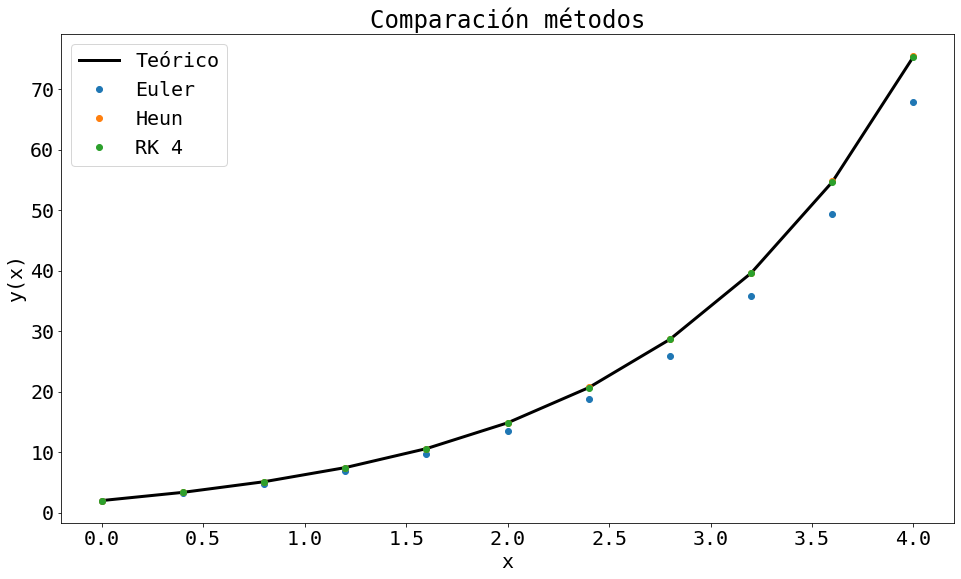

In [25]:
N = 10
xe, ye = dfsolve(N, method = paso_euler)
xh, yh = dfsolve(N, method = paso_heun)
xrk, yrk = dfsolve(N, method = RK)


y_teorico = F_teorico(xrk)

plt.plot(xrk, y_teorico, 'k', lw=3, label='Teórico')
plt.plot(xe, ye, 'o', label= 'Euler')
plt.plot(xh, yh, 'o', label= 'Heun')
plt.plot(xrk, yrk, 'o', label='RK 4')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.title('Comparación métodos')
plt.legend()


In [26]:
muestras = np.logspace(1, 5, 20).astype(int)
# print(muestras)
e_e = []
e_h = []
e_rk = []
e2_e = []
e2_h = []
e2_rk = []
for N in muestras:
    xe, ye = dfsolve(N, method = paso_euler)
    xh, yh = dfsolve(N, method = paso_heun)
    xrk, yrk = dfsolve(N, method = RK)
    y_teorico = F_teorico(xrk)
    
    e_e.append(error(y_teorico, ye))
    e_h.append(error(y_teorico, yh))
    e_rk.append(error(y_teorico, yrk))
    
    e2_e.append(errorprome(y_teorico, ye))
    e2_h.append(errorprome(y_teorico, yh))
    e2_rk.append(errorprome(y_teorico, yrk))
    

    
# for e in [e_e, e_h, e_rk]:
#     plt.loglog(muestras, np.array(e), '-o')

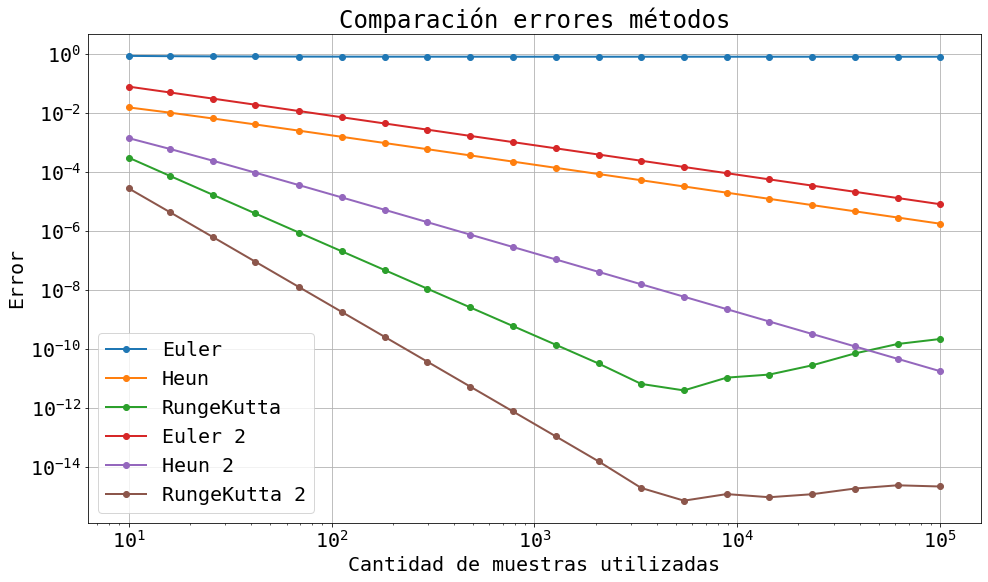

In [27]:
plt.loglog(muestras, e_e, 'o-', label='Euler')#'Teórico')
plt.loglog(muestras, e_h, 'o-', label= 'Heun') #'Euler')
plt.loglog(muestras, e_rk, 'o-', label= 'RungeKutta')#'Heun')
plt.loglog(muestras, e2_e, 'o-', label='Euler 2')#'Teórico')
plt.loglog(muestras, e2_h, 'o-', label= 'Heun 2') #'Euler')
plt.loglog(muestras, e2_rk, 'o-', label= 'RungeKutta 2')#'Heun')
plt.title('Comparación errores métodos')
plt.xlabel('Cantidad de muestras utilizadas')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

    